In [37]:
import pandas as pd
from matplotlib import pyplot as plt

### Read in the match points from 2011-2021 for grand-slam tournaments

In [38]:
points_aus = pd.read_csv(f"../data/grand-slam-point-data/combined-points-tour/ausopen-combined-points.csv", encoding='unicode_escape', low_memory=False)
match_aus = pd.read_csv(f"../data/grand-slam-point-data/combined-matches-tour/ausopen-combined-matches.csv", encoding='unicode_escape', low_memory=False)
combined = pd.merge(points_aus, match_aus, on="match_id", how="inner")
grand_slams = ["ausopen", "frenchopen", "usopen", "wimbledon"]

points = combined
points

,Unnamed: 0_x,match_id,ElapsedTime,SetNo,P1GamesWon,P2GamesWon,SetWinner,GameNo,GameWinner,PointNumber,...,round,court_name,court_id,player1id,player2id,nation1,nation2,match_id_num_y,player1_new,player2_new
0,0,2011-ausopen-1101,00:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0,...,Round 1,Rod Laver Arena,A,atpn409,atpd339,ESP,BRA,1101,R Nadal,M Daniel
1,1,2011-ausopen-1101,0:00:00,1.0,0.0,0.0,0.0,1.0,0.0,1,...,Round 1,Rod Laver Arena,A,atpn409,atpd339,ESP,BRA,1101,R Nadal,M Daniel
2,2,2011-ausopen-1101,0:00:23,1.0,0.0,0.0,0.0,1.0,0.0,2,...,Round 1,Rod Laver Arena,A,atpn409,atpd339,ESP,BRA,1101,R Nadal,M Daniel
3,3,2011-ausopen-1101,0:00:59,1.0,0.0,0.0,0.0,1.0,0.0,3,...,Round 1,Rod Laver Arena,A,atpn409,atpd339,ESP,BRA,1101,R Nadal,M Daniel
4,4,2011-ausopen-1101,0:01:57,1.0,1.0,0.0,0.0,1.0,1.0,4,...,Round 1,Rod Laver Arena,A,atpn409,atpd339,ESP,BRA,1101,R Nadal,M Daniel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262820,27074,2021-ausopen-1701,NaN,3.0,NaN,NaN,NaN,28.0,NaN,151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1701,N Djokovic,D Medvedev
262821,27075,2021-ausopen-1701,NaN,3.0,NaN,NaN,NaN,28.0,NaN,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1701,N Djokovic,D Medvedev
262822,27076,2021-ausopen-1701,NaN,3.0,NaN,NaN,NaN,28.0,NaN,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1701,N Djokovic,D Medvedev
262823,27077,2021-ausopen-1701,NaN,3.0,NaN,NaN,NaN,28.0,NaN,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1701,N Djokovic,D Medvedev


P1BreakPoint == 1 if P1 is receiveing and is one point from winning the game ("breaking" the opponent's serve point)

In [39]:
points.columns

Index(['Unnamed: 0_x', 'match_id', 'ElapsedTime', 'SetNo', 'P1GamesWon',
       'P2GamesWon', 'SetWinner', 'GameNo', 'GameWinner', 'PointNumber',
       'PointWinner', 'PointServer', 'Speed_KMH', 'Rally', 'P1Score',
       'P2Score', 'P1Momentum', 'P2Momentum', 'P1PointsWon', 'P2PointsWon',
       'P1Ace', 'P2Ace', 'P1Winner', 'P2Winner', 'P1DoubleFault',
       'P2DoubleFault', 'P1UnfErr', 'P2UnfErr', 'P1NetPoint', 'P2NetPoint',
       'P1NetPointWon', 'P2NetPointWon', 'P1BreakPoint', 'P2BreakPoint',
       'P1BreakPointWon', 'P2BreakPointWon', 'P1FirstSrvIn', 'P2FirstSrvIn',
       'P1FirstSrvWon', 'P2FirstSrvWon', 'P1SecondSrvIn', 'P2SecondSrvIn',
       'P1SecondSrvWon', 'P2SecondSrvWon', 'P1ForcedError', 'P2ForcedError',
       'History', 'Speed_MPH', 'P1BreakPointMissed', 'P2BreakPointMissed',
       'ServeIndicator', 'P1TurningPoint', 'P2TurningPoint', 'Serve_Direction',
       'Winner_FH', 'Winner_BH', 'ServingTo', 'ServeNumber', 'WinnerType',
       'WinnerShotType', 'P1Distan

In [40]:
real_points = points[points['PointWinner'].ge(1)]

In [41]:
real_points[real_points["PointServer"].isna()]["match_id"].nunique()

0

In [42]:
real_points["PointServer"]

1         2.0
2         2.0
3         2.0
4         2.0
5         1.0
         ... 
262820    2.0
262821    2.0
262822    2.0
262823    2.0
262824    2.0
Name: PointServer, Length: 262399, dtype: float64

In [43]:
# P1 has a breakpoint when P2 is serving, and P1 is up 0-40, 15-40, 30-40, or 40-AD
p1_breakpoint =\
  (real_points["PointServer"] == 2) &\
  (((real_points["P1Score"] == "40") &
    (real_points["P2Score"] != "40") &
    (real_points["P2Score"] != "AD")) |
  (real_points["P1Score"] == "AD"))
p2_breakpoint =\
  (real_points["PointServer"] == 1) &\
  (((real_points["P2Score"] == "40") &
    (real_points["P1Score"] != "40") &
    (real_points["P1Score"] != "AD")) |
  (real_points["P2Score"] == "AD"))
real_points.loc[:, "P1BreakPoint"] = p1_breakpoint.shift(1, fill_value=False) # P1Score is P1's score after the point is played
real_points.loc[:, "P2BreakPoint"] = p2_breakpoint.shift(1, fill_value=False)

C:\Users\anhmi\miniconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [44]:
p1_breakpoint.shift(1, fill_value=False)

1         False
2         False
3         False
4          True
5         False
          ...  
262820    False
262821    False
262822    False
262823    False
262824     True
Length: 262399, dtype: bool

In [45]:
real_points[["P1Score", "P2Score", "PointServer", "PointWinner", "P1BreakPoint"]][:6]

,P1Score,P2Score,PointServer,PointWinner,P1BreakPoint
1,15,0,2.0,1.0,False
2,30,0,2.0,1.0,False
3,40,0,2.0,1.0,False
4,0,0,2.0,1.0,True
5,15,0,1.0,1.0,False
6,30,0,1.0,1.0,False


In [46]:
bp_groups = real_points.groupby(by=["player1_new", "player2_new", "P1BreakPoint", "P2BreakPoint", "PointWinner", "PointServer"])
counts_by_bp = bp_groups.size().reset_index(name="count")

In [47]:
unique_players = set(counts_by_bp["player1_new"].unique().tolist() + counts_by_bp["player2_new"].unique().tolist())
player_bps_dict = dict()
for p in unique_players:
  player_bps_dict[p] = {
    'receive_nobreak_won': 0,
    'receive_nobreak_faced': 0,
    'serve_nobreak_won': 0,
    'serve_nobreak_faced': 0,
    'receive_break_won': 0,
    'receive_break_faced': 0,
    'serve_break_won': 0,
    'serve_break_faced': 0,
  }

In [48]:
print('\n'.join(sorted(unique_players)))
print(len(unique_players))

A Balazs
A Bedene
A Bolt
A Bublik
A Davidovich Fokina
A De Minaur
A Dolgopolov
A Falla
A Golubev
A Gonzalez
A Haider-Maurer
A Harris
A Karatsev
A Krajicek
A Kudryavtsev
A Kuznetsov
A Mannarino
A Martin
A Montanes
A Muller
A Murray
A Nedovyesov
A Pavlasek
A Popyrin
A Ramos-Vinolas
A Roddick
A Rublev
A Seppi
A Tabilo
A Vukic
A Weintraub
A Whittington
A Zverev
B Baker
B Becker
B Coric
B Fratangelo
B Kavcic
B Klahn
B Mitchell
B Mott
B Paire
B Tomic
B Van De Zandschulp
C Alcaraz
C Ball
C Berlocq
C Eubanks
C Garin
C Moutet
C Norrie
C O'Connell
C Ruud
C Stebe
D Brands
D Brown
D Dzumhur
D Evans
D Ferrer
D Galan
D Gimeno-Traver
D Goffin
D Guez
D Istomin
D Koepfer
D Kudla
D Lajovic
D Medvedev
D Munoz-De La Nava
D Nalbandian
D Novak
D Schwartzman
D Sela
D Shapovalov
D Thiem
D Tursunov
D Udomchoke
D Wu
D Young
E Benchetrit
E Donskoy
E Escobedo
E Gerasimov
E Gulbis
E Roger-Vasselin
E Ruusuvuori
E Schwank
E Ymer
F Auger-Aliassime
F Bagnis
F Cipolla
F Coria
F Dancevic
F Delbonis
F Ferreira Silva
F Fo

In [49]:
for row in counts_by_bp.to_dict("records"):
  if row["P1BreakPoint"]:
    if row["PointWinner"] == 1:
      player_bps_dict[row["player1_new"]]["receive_break_won"] += row["count"]
      player_bps_dict[row["player1_new"]]["receive_break_faced"] += row["count"]
      player_bps_dict[row["player2_new"]]["serve_break_faced"] += row["count"]
    else:
      player_bps_dict[row["player2_new"]]["serve_break_won"] += row["count"]
      player_bps_dict[row["player1_new"]]["receive_break_faced"] += row["count"]
      player_bps_dict[row["player2_new"]]["serve_break_faced"] += row["count"]
  elif row["P2BreakPoint"]:
    if row["PointWinner"] == 1:
      player_bps_dict[row["player1_new"]]["serve_break_won"] += row["count"]
      player_bps_dict[row["player1_new"]]["serve_break_faced"] += row["count"]
      player_bps_dict[row["player2_new"]]["receive_break_faced"] += row["count"]
    else:
      player_bps_dict[row["player2_new"]]["receive_break_won"] += row["count"]
      player_bps_dict[row["player1_new"]]["serve_break_faced"] += row["count"]
      player_bps_dict[row["player2_new"]]["receive_break_faced"] += row["count"]
  else:
    if row["PointWinner"] == 1:
      if row["PointServer"] == 1:
        player_bps_dict[row["player1_new"]]["serve_nobreak_won"] += row["count"]
        player_bps_dict[row["player1_new"]]["serve_nobreak_faced"] += row["count"]
        player_bps_dict[row["player2_new"]]["receive_nobreak_faced"] += row["count"]
      else:
        player_bps_dict[row["player1_new"]]["receive_nobreak_won"] += row["count"]
        player_bps_dict[row["player1_new"]]["receive_nobreak_faced"] += row["count"]
        player_bps_dict[row["player2_new"]]["serve_nobreak_faced"] += row["count"]
    else:
      if row["PointServer"] == 1:
        player_bps_dict[row["player2_new"]]["receive_nobreak_won"] += row["count"]
        player_bps_dict[row["player1_new"]]["serve_nobreak_faced"] += row["count"]
        player_bps_dict[row["player2_new"]]["receive_nobreak_faced"] += row["count"]
      else:
        player_bps_dict[row["player2_new"]]["serve_nobreak_won"] += row["count"]
        player_bps_dict[row["player1_new"]]["receive_nobreak_faced"] += row["count"]
        player_bps_dict[row["player2_new"]]["serve_nobreak_faced"] += row["count"]

In [50]:
player_bps = pd.DataFrame.from_dict(player_bps_dict, orient="index")

In [51]:
player_bps.aggregate("sum")

receive_nobreak_won       85949
receive_nobreak_faced    240336
serve_nobreak_won        154387
serve_nobreak_faced      240336
receive_break_won          8886
receive_break_faced       22063
serve_break_won           13177
serve_break_faced         22063
dtype: int64

In [52]:
player_bps.index

Index(['G Elias', 'T Fabbiano', 'P Carreno Busta', 'M Giron', 'K Edmund',
       'C Norrie', 'S Giraldo', 'Z Li', 'T Bellucci', 'M Polmans',
       ...
       'M Fish', 'C Ruud', 'D Tursunov', 'B Tomic', 'D Galan', 'P Cuevas',
       'I Dodig', 'F Cipolla', 'B Mott', 'S Greul'],
      dtype='object', length=332)

In [53]:
# laplace smoothing assuming 64% serve win pct over 100 ghost points. assume 60% for break points
player_bps["serve_nobreak_pct"] = (player_bps["serve_nobreak_won"] + 64) / (player_bps["serve_nobreak_faced"] + 100)
player_bps["serve_break_pct"] = (player_bps["serve_break_won"] + 60) / (player_bps["serve_break_faced"] + 100)
player_bps["receive_nobreak_pct"] = (player_bps["receive_nobreak_won"] + 36) / (player_bps["receive_nobreak_faced"] + 100)
player_bps["receive_break_pct"] = (player_bps["receive_break_won"] + 40) / (player_bps["receive_break_faced"] + 100)

player_bps["serve_choke_pct"] = player_bps["serve_nobreak_pct"] - player_bps["serve_break_pct"] - 0.02 # correcting for 4% difference in averages
player_bps["receive_choke_pct"] = player_bps["receive_nobreak_pct"] - player_bps["receive_break_pct"] + 0.04
player_bps["choke_pct"] = (player_bps["serve_choke_pct"] + player_bps["receive_choke_pct"]) / 2

In [54]:
player_bps

,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
G Elias,13,64,28,56,0,0,5,11,0.589744,0.585586,0.298780,0.400000,-0.015842,-0.061220,-0.038531
T Fabbiano,149,458,306,472,11,35,16,30,0.646853,0.584615,0.331541,0.377778,0.042238,-0.006237,0.018001
P Carreno Busta,651,1816,1184,1832,72,169,100,162,0.645963,0.610687,0.358559,0.416357,0.015276,-0.017797,-0.001261
M Giron,46,184,118,203,3,9,18,33,0.600660,0.586466,0.288732,0.394495,-0.005806,-0.065763,-0.035785
K Edmund,380,1101,724,1094,33,100,44,77,0.659966,0.587571,0.346378,0.365000,0.052396,0.021378,0.036887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P Cuevas,291,895,580,906,31,69,44,83,0.640159,0.568306,0.328643,0.420118,0.051853,-0.051475,0.000189
I Dodig,288,810,478,797,27,69,52,90,0.604236,0.589474,0.356044,0.396450,-0.005237,-0.000406,-0.002822
F Cipolla,35,96,48,88,3,7,6,12,0.595745,0.589286,0.362245,0.401869,-0.013541,0.000376,-0.006583
B Mott,23,81,43,70,1,1,3,8,0.629412,0.583333,0.325967,0.405941,0.026078,-0.039974,-0.006948


In [55]:
counts_by_bp["p1_choke_pct"] = 0
counts_by_bp["p2_choke_pct"] = 0

In [56]:
for player, stats in player_bps.iterrows():
   counts_by_bp["p1_choke_pct"][counts_by_bp["player1_new"] == player] = stats["choke_pct"]
   counts_by_bp["p2_choke_pct"][counts_by_bp["player2_new"] == player] = stats["choke_pct"]

C:\Users\anhmi\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anhmi\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anhmi\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anh

In [57]:
swapped_counts_by_bp = counts_by_bp.copy()
temp = swapped_counts_by_bp["player1_new"].copy()
swapped_counts_by_bp["player1_new"] = swapped_counts_by_bp["player2_new"].copy()
swapped_counts_by_bp["player2_new"] = temp
temp = swapped_counts_by_bp["p1_choke_pct"].copy()
swapped_counts_by_bp["p1_choke_pct"] = swapped_counts_by_bp["p2_choke_pct"].copy()
swapped_counts_by_bp["p2_choke_pct"] = temp
compare_opponents = counts_by_bp.append(swapped_counts_by_bp)
compare_opponents["opp_choke_adj"] = compare_opponents["count"] * compare_opponents["p2_choke_pct"]

In [61]:
avg_opponent_choking = compare_opponents.groupby("player1_new").agg("sum")
avg_opponent_choking["p1_choke_pct"] = avg_opponent_choking["p1_choke_pct"] / avg_opponent_choking["count"] * 30
avg_opponent_choking["opp_choke_adj"] /= avg_opponent_choking["count"]
sorted_opp_choking = avg_opponent_choking[avg_opponent_choking["count"] > 2500].sort_values(by="opp_choke_adj")
sorted_opp_choking = sorted_opp_choking.filter(["player1_new", "count", "p1_choke_pct", "opp_choke_adj"])
sorted_opp_choking.to_csv("../data/opponent_choking_aus.csv")
sorted_opp_choking

,count,p1_choke_pct,opp_choke_adj
player1_new,,,
R Gasquet,4177,0.100279,-0.006211
M Ebden,2586,0.037165,-0.005328
K Khachanov,3294,0.009781,-0.005032
J Isner,4774,0.023143,-0.003555
S Tsitsipas,3080,0.029998,-0.002936
...,...,...,...
N Almagro,3481,0.012101,0.017097
A Ramos-Vinolas,2593,0.000460,0.017590
M Fucsovics,2993,0.031099,0.017655


In [62]:
for player, stats in player_bps.iterrows():
   counts_by_bp["p1_choke_pct"][counts_by_bp["player1_new"] == player] = stats["choke_pct"]
   counts_by_bp["p2_choke_pct"][counts_by_bp["player2_new"] == player] = stats["choke_pct"]

C:\Users\anhmi\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anhmi\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
swapped_counts_by_bp = counts_by_bp.copy()
temp = swapped_counts_by_bp["player1_new"].copy()
swapped_counts_by_bp["player1_new"] = swapped_counts_by_bp["player2_new"].copy()
swapped_counts_by_bp["player2_new"] = temp
temp = swapped_counts_by_bp["p1_choke_pct"].copy()
swapped_counts_by_bp["p1_choke_pct"] = swapped_counts_by_bp["p2_choke_pct"].copy()
swapped_counts_by_bp["p2_choke_pct"] = temp
compare_opponents = counts_by_bp.append(swapped_counts_by_bp)
compare_opponents["opp_choke_adj"] = compare_opponents["count"] * compare_opponents["p2_choke_pct"]

In [64]:
avg_opponent_choking = compare_opponents.groupby("player1_new").agg("sum")
avg_opponent_choking["p1_choke_pct"] = avg_opponent_choking["p1_choke_pct"] / avg_opponent_choking["count"] * 30
avg_opponent_choking["opp_choke_adj"] /= avg_opponent_choking["count"]
sorted_opp_choking = avg_opponent_choking[avg_opponent_choking["count"] > 2500].sort_values(by="opp_choke_adj")
sorted_opp_choking = sorted_opp_choking.filter(["player1_new", "count", "p1_choke_pct", "opp_choke_adj"])
sorted_opp_choking.to_csv("../data/opponent_choking_aus.csv")
sorted_opp_choking

,count,p1_choke_pct,opp_choke_adj
player1_new,,,
R Gasquet,4177,0.100279,-0.006211
M Ebden,2586,0.037165,-0.005328
K Khachanov,3294,0.009781,-0.005032
J Isner,4774,0.023143,-0.003555
S Tsitsipas,3080,0.029998,-0.002936
...,...,...,...
N Almagro,3481,0.012101,0.017097
A Ramos-Vinolas,2593,0.000460,0.017590
M Fucsovics,2993,0.031099,0.017655


In [65]:
chokiest = player_bps[player_bps["receive_break_faced"].ge(100)].sort_values("choke_pct")
all = player_bps.sort_values("choke_pct")

In [66]:
chokiest.to_csv("../data/chokiest_aus.csv")
all.to_csv("../data/all_aus.csv")

In [67]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [77]:
df = pd.read_csv(f"../data/all_aus - Copy.csv")

In [78]:
df

,name,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
0,M Krueger,13,63,45,97,1,2,14,20,0.553299,0.616667,0.300613,0.401961,-0.083367,-0.061347,-0.072357
1,N Jarry,33,192,152,241,0,1,16,21,0.633431,0.628099,0.236301,0.396040,-0.014668,-0.119738,-0.067203
2,A Golubev,26,91,50,112,3,4,16,26,0.537736,0.603175,0.324607,0.413462,-0.085439,-0.048854,-0.067146
3,D Brown,51,248,174,309,2,9,21,37,0.581907,0.591241,0.250000,0.385321,-0.029334,-0.095321,-0.062327
4,F Ferreira Silva,12,63,52,98,2,2,13,21,0.585859,0.603306,0.294479,0.411765,-0.037447,-0.077286,-0.057367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,N Djokovic,2767,6385,4293,6061,385,854,220,351,0.707190,0.620843,0.432228,0.445493,0.066348,0.026736,0.046542
328,I Ljubicic,114,320,209,296,9,30,6,11,0.689394,0.594595,0.357143,0.376923,0.074799,0.020220,0.047510
329,J Sousa,510,1443,866,1350,35,126,68,120,0.641379,0.581818,0.353856,0.331858,0.039561,0.061998,0.050779
330,L Pouille,378,1169,755,1104,24,86,39,74,0.680233,0.568966,0.326241,0.344086,0.091267,0.022155,0.056711


In [79]:
fig = px.scatter(data_frame=df, x="serve_choke_pct", y="receive_choke_pct", hover_name='name')
inds = [327]
fig.data[0].update(selectedpoints=inds,
                   selected=dict(marker=dict(color='red')),
                   unselected=dict(marker=dict(color='blue')))
fig.show()

In [73]:
fig = px.scatter(data_frame=df, x="serve_choke_pct", y="receive_choke_pct", hover_name='name')
fig.show()

In [74]:
df2 = df.iloc[inds, range(0, 16)]
df2

IndexError: positional indexers are out-of-bounds

In [28]:
fig = px.scatter(data_frame=df2, x="serve_choke_pct", y="receive_choke_pct", hover_name='name', color='name')
fig.show()

In [29]:
#[66, 76, 80, 151, 152, 155, 157, 170, 172, 181, 185]
df5 = df.iloc[[152, 170, 172], range(0, 16)]
df3 = df.iloc[[76, 155, 181], range(0, 16)]
df4 = df.iloc[[66, 157], range(0, 16)]
df4

,name,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
66,R Nadal,7332,17095,11621,16894,1086,2314,814,1212,0.687596,0.666159,0.428497,0.466446,0.001437,0.002051,0.001744
157,N Djokovic,10370,24036,16195,23376,1455,3245,1032,1571,0.692580,0.653501,0.431140,0.446936,0.019079,0.024204,0.021642


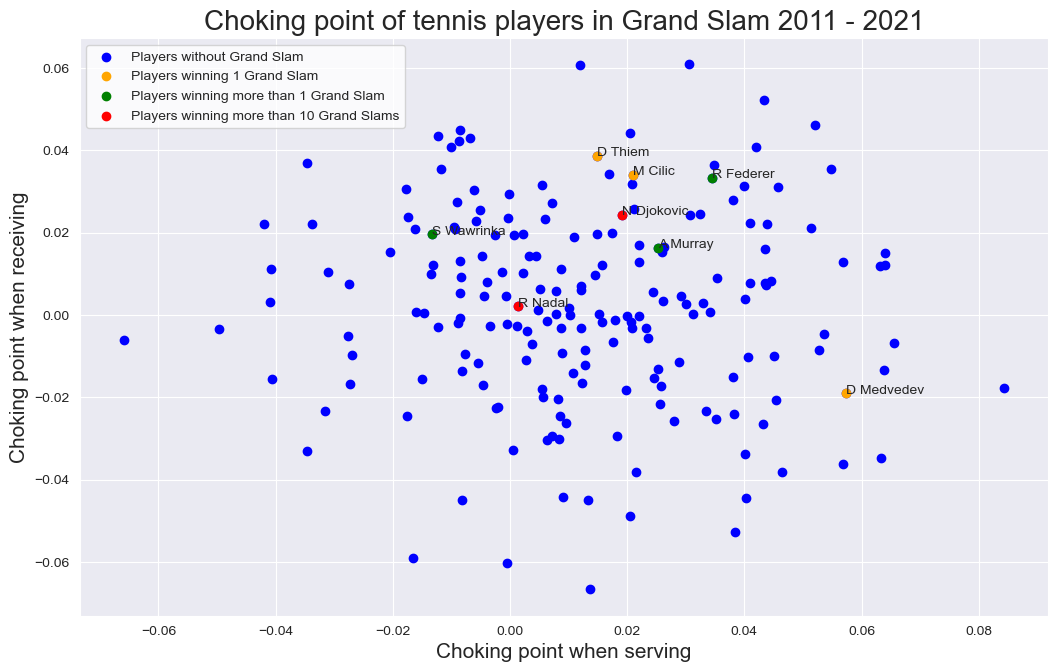

In [30]:
plt.rcParams["figure.figsize"] = (12.5,7.5)
plt.scatter(df.serve_choke_pct, df.receive_choke_pct, color="blue", label="Players without Grand Slam")
plt.scatter(df5.serve_choke_pct, df5.receive_choke_pct, color="orange", label="Players winning 1 Grand Slam")
plt.scatter(df3.serve_choke_pct, df3.receive_choke_pct, color="green", label="Players winning more than 1 Grand Slam")
plt.scatter(df4.serve_choke_pct, df4.receive_choke_pct, color="red", label="Players winning more than 10 Grand Slams")
for i in range(df2.shape[0]):
    plt.annotate(df2.name.tolist()[i], (df2.serve_choke_pct.tolist()[i], df2.receive_choke_pct.tolist()[i]))
sns.set_style("whitegrid")
plt.xlabel("Choking point when serving", fontsize=15)
plt.ylabel("Choking point when receiving", fontsize=15)
plt.title("Choking point of tennis players in Grand Slam 2011 - 2021", fontsize=20)
plt.legend()
plt.savefig("../plots/choke.png")

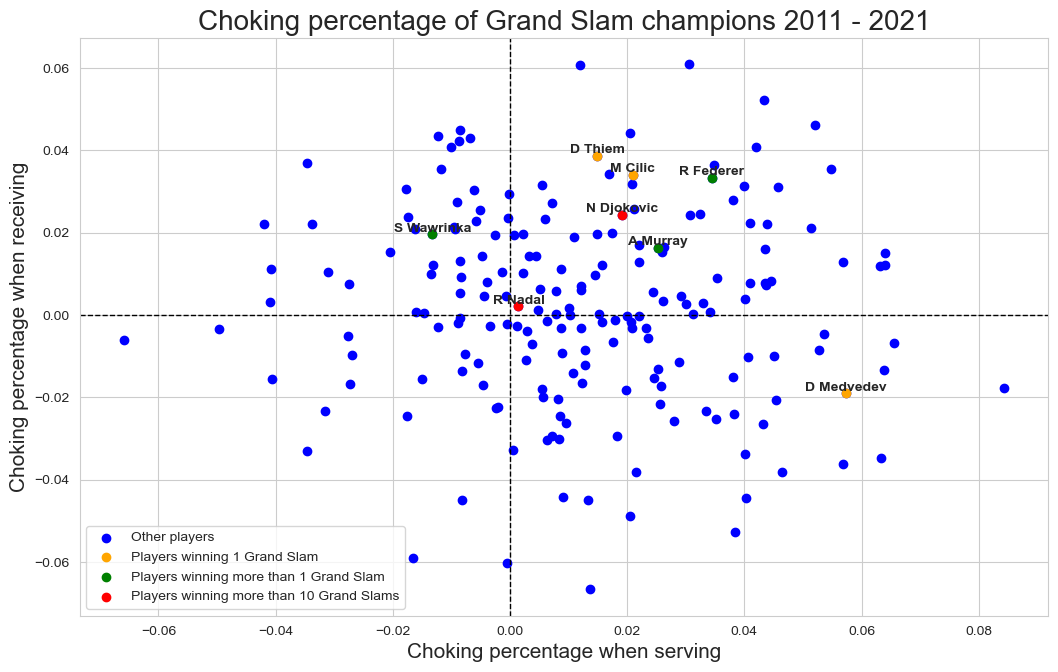

In [31]:
plt.figure(figsize=(12.5, 7.5), edgecolor='black')
plt.scatter(df.serve_choke_pct, df.receive_choke_pct, color="blue", label="Other players")
plt.scatter(df5.serve_choke_pct, df5.receive_choke_pct, color="orange", label="Players winning 1 Grand Slam")
plt.scatter(df3.serve_choke_pct, df3.receive_choke_pct, color="green", label="Players winning more than 1 Grand Slam")
plt.scatter(df4.serve_choke_pct, df4.receive_choke_pct, color="red", label="Players winning more than 10 Grand Slams")
for i in range(df2.shape[0]):
    plt.annotate(df2.name.tolist()[i], (df2.serve_choke_pct.tolist()[i], df2.receive_choke_pct.tolist()[i]), fontsize=10, weight='bold', ha='center', va='bottom')
sns.set_style("whitegrid")
plt.xlabel("Choking percentage when serving", fontsize=15)
plt.ylabel("Choking percentage when receiving", fontsize=15)
plt.title("Choking percentage of Grand Slam champions 2011 - 2021", fontsize=20)
plt.legend(prop={'size': 10}, loc=3)
plt.axhline(linewidth=1, color='black', linestyle='dashed')
plt.axvline(linewidth=1, color='black', linestyle='dashed')
plt.savefig("../plots/choke2.png")

In [32]:
df_all = pd.read_csv('../data/all - Copy.csv')
df_all

,name,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
0,A Ward,37,153,83,164,1,2,19,31,0.556818,0.603053,0.288538,0.401961,-0.066235,-0.073423,-0.069829
1,A Golubev,146,434,225,456,15,32,53,90,0.519784,0.594737,0.340824,0.416667,-0.094953,-0.035843,-0.065398
2,R Schuettler,36,134,74,153,1,2,20,33,0.545455,0.601504,0.307692,0.401961,-0.076049,-0.054268,-0.065159
3,O Rochus,72,323,198,357,3,10,26,47,0.573304,0.585034,0.255319,0.390909,-0.031730,-0.095590,-0.063660
4,T De Bakker,116,426,280,480,7,19,46,70,0.593103,0.623529,0.288973,0.394958,-0.050426,-0.065985,-0.058205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,N Milojevic,110,260,119,184,15,42,16,28,0.644366,0.593750,0.405556,0.387324,0.030616,0.058232,0.044424
444,I Ivashka,488,1302,818,1262,47,130,62,113,0.647577,0.572770,0.373752,0.378261,0.054807,0.035491,0.045149
445,E Ruusuvuori,397,974,569,941,51,138,61,117,0.608069,0.557604,0.403166,0.382353,0.030465,0.060813,0.045639
446,M Fish,986,2519,1622,2386,98,265,98,157,0.678198,0.614786,0.390225,0.378082,0.043412,0.052143,0.047778


In [33]:
inds_all = [254, 395, 429, 391, 271, 417, 414, 386]
df2_all = df_all.iloc[inds_all, range(0, 16)]
df5_all = df_all.iloc[[417, 414, 386], range(0, 16)]
df3_all = df_all.iloc[[429, 391, 271], range(0, 16)]
df4_all = df_all.iloc[[254, 395], range(0, 16)]
df2_all

,name,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
254,R Nadal,7332,17095,11621,16894,1086,2314,814,1212,0.687596,0.666159,0.428497,0.466446,0.001437,0.002051,0.001744
395,N Djokovic,10370,24036,16195,23376,1455,3245,1032,1571,0.692580,0.653501,0.431140,0.446936,0.019079,0.024204,0.021642
429,R Federer,7417,18504,12585,17600,864,2119,622,933,0.714633,0.660213,0.400613,0.407391,0.034420,0.033222,0.033821
391,A Murray,6711,16068,10578,15950,871,1966,745,1203,0.663053,0.617805,0.417306,0.440949,0.025248,0.016357,0.020802
271,S Wawrinka,5508,14784,10144,15097,580,1478,734,1094,0.671712,0.664992,0.372481,0.392902,-0.013280,0.019578,0.003149
417,M Cilic,5217,13707,9001,13227,533,1383,624,970,0.680198,0.639252,0.380459,0.386379,0.020946,0.034080,0.027513
414,D Thiem,3963,10121,6522,9847,463,1181,502,796,0.662109,0.627232,0.391253,0.392662,0.014877,0.038591,0.026734
386,D Medvedev,2324,5813,3868,5749,316,677,269,453,0.672252,0.594937,0.399121,0.458172,0.057315,-0.019052,0.019132


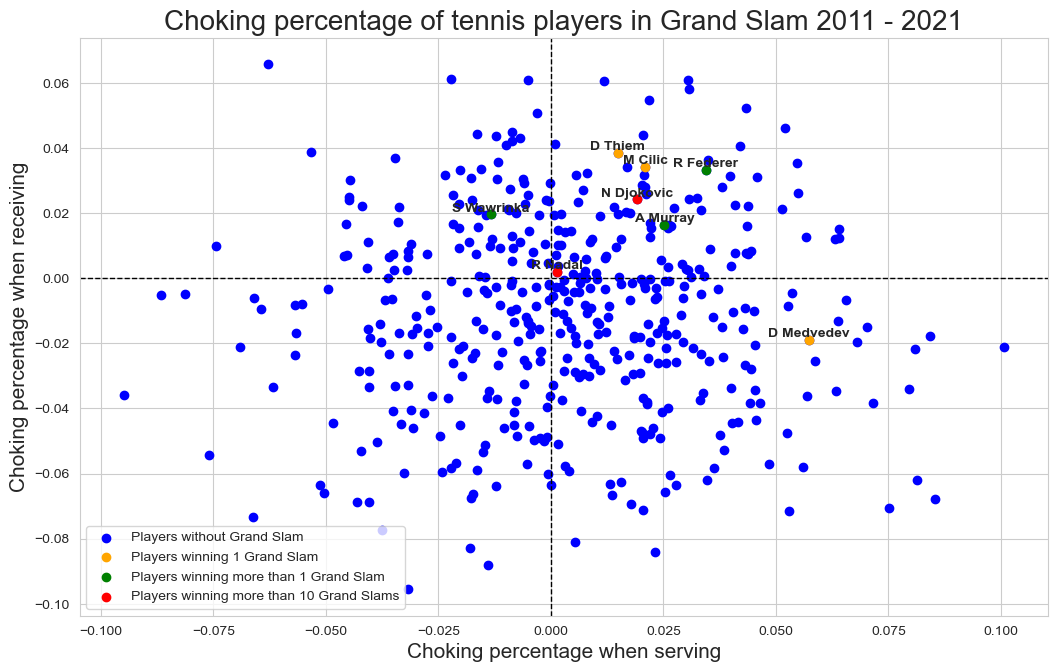

In [34]:
plt.figure(figsize=(12.5, 7.5), edgecolor='black')
plt.scatter(df_all.serve_choke_pct, df_all.receive_choke_pct, color="blue", label="Players without Grand Slam")
plt.scatter(df5_all.serve_choke_pct, df5_all.receive_choke_pct, color="orange", label="Players winning 1 Grand Slam")
plt.scatter(df3_all.serve_choke_pct, df3_all.receive_choke_pct, color="green", label="Players winning more than 1 Grand Slam")
plt.scatter(df4_all.serve_choke_pct, df4_all.receive_choke_pct, color="red", label="Players winning more than 10 Grand Slams")
for i in range(df2_all.shape[0]):
    plt.annotate(df2_all.name.tolist()[i], (df2_all.serve_choke_pct.tolist()[i], df2_all.receive_choke_pct.tolist()[i]), fontsize=10, weight='bold', ha='center', va='bottom')
sns.set_style("whitegrid")
plt.xlabel("Choking percentage when serving", fontsize=15)
plt.ylabel("Choking percentage when receiving", fontsize=15)
plt.title("Choking percentage of tennis players in Grand Slam 2011 - 2021", fontsize=20)
plt.legend(prop={'size': 10}, loc=3)
plt.axhline(linewidth=1, color='black', linestyle='dashed')
plt.axvline(linewidth=1, color='black', linestyle='dashed')
plt.savefig("../plots/choke3.png")

In [35]:
inds_runnerup = [157, 66, 155, 181, 168, 172, 76, 115, 179, 185, 163, 152, 174, 32]
df2_runnerup = df.iloc[inds_runnerup, range(0, 16)]
df5_runnerup = df.iloc[[76, 115, 179, 185, 163, 152, 174, 32], range(0, 16)]
df3_runnerup = df.iloc[[168, 172], range(0, 16)]
df4_runnerup = df.iloc[[157, 66, 155, 181], range(0, 16)]
df2_runnerup

,name,receive_nobreak_won,receive_nobreak_faced,serve_nobreak_won,serve_nobreak_faced,receive_break_won,receive_break_faced,serve_break_won,serve_break_faced,serve_nobreak_pct,serve_break_pct,receive_nobreak_pct,receive_break_pct,serve_choke_pct,receive_choke_pct,choke_pct
157,N Djokovic,10370,24036,16195,23376,1455,3245,1032,1571,0.692580,0.653501,0.431140,0.446936,0.019079,0.024204,0.021642
66,R Nadal,7332,17095,11621,16894,1086,2314,814,1212,0.687596,0.666159,0.428497,0.466446,0.001437,0.002051,0.001744
155,A Murray,6711,16068,10578,15950,871,1966,745,1203,0.663053,0.617805,0.417306,0.440949,0.025248,0.016357,0.020802
181,R Federer,7417,18504,12585,17600,864,2119,622,933,0.714633,0.660213,0.400613,0.407391,0.034420,0.033222,0.033821
168,K Anderson,3652,10792,7280,10576,284,834,481,736,0.687898,0.647129,0.338597,0.346895,0.020769,0.031702,0.026235
172,M Cilic,5217,13707,9001,13227,533,1383,624,970,0.680198,0.639252,0.380459,0.386379,0.020946,0.034080,0.027513
76,S Wawrinka,5508,14784,10144,15097,580,1478,734,1094,0.671712,0.664992,0.372481,0.392902,-0.013280,0.019578,0.003149
115,M Raonic,4164,12027,8413,11717,367,1009,473,665,0.717356,0.696732,0.346335,0.366997,0.000624,0.019337,0.009981
179,D Ferrer,4602,10912,6912,10614,599,1375,523,883,0.651111,0.593082,0.421177,0.433220,0.038028,0.027957,0.032992
185,J Martin Del Potro,3214,8491,5681,8312,342,862,318,518,0.682953,0.611650,0.378303,0.397089,0.051302,0.021213,0.036258


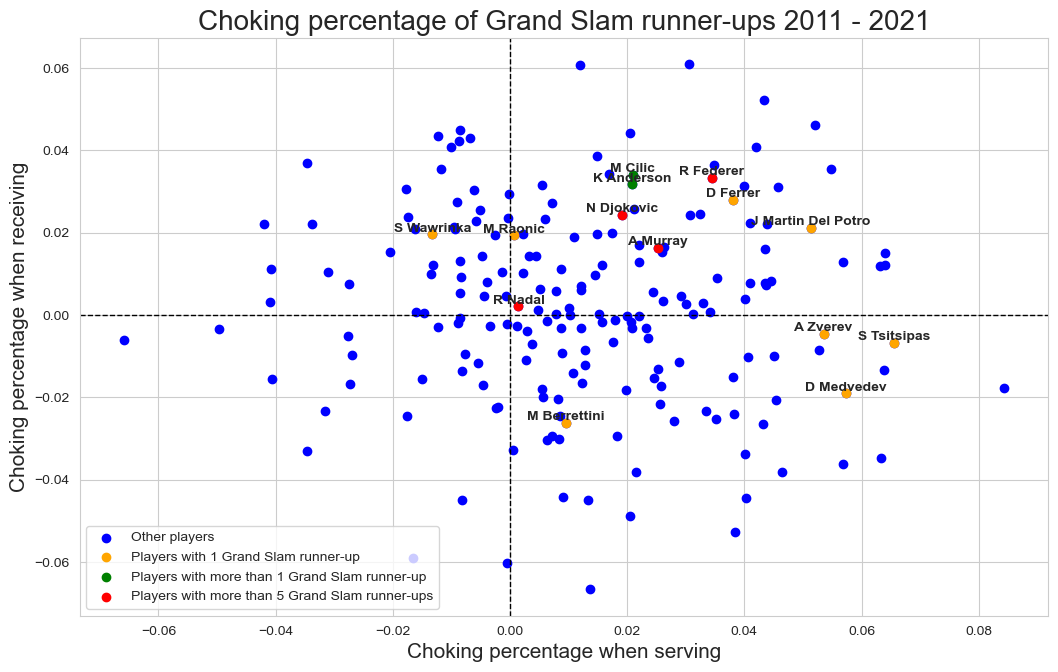

In [36]:
plt.figure(figsize=(12.5, 7.5), edgecolor='black')
plt.scatter(df.serve_choke_pct, df.receive_choke_pct, color="blue", label="Other players")
plt.scatter(df5_runnerup.serve_choke_pct, df5_runnerup.receive_choke_pct, color="orange", label="Players with 1 Grand Slam runner-up")
plt.scatter(df3_runnerup.serve_choke_pct, df3_runnerup.receive_choke_pct, color="green", label="Players with more than 1 Grand Slam runner-up")
plt.scatter(df4_runnerup.serve_choke_pct, df4_runnerup.receive_choke_pct, color="red", label="Players with more than 5 Grand Slam runner-ups")
for i in range(df2_runnerup.shape[0]):
    plt.annotate(df2_runnerup.name.tolist()[i], (df2_runnerup.serve_choke_pct.tolist()[i], df2_runnerup.receive_choke_pct.tolist()[i]), fontsize=10, weight='bold', ha='center', va='bottom')
sns.set_style("whitegrid")
plt.xlabel("Choking percentage when serving", fontsize=15)
plt.ylabel("Choking percentage when receiving", fontsize=15)
plt.title("Choking percentage of Grand Slam runner-ups 2011 - 2021", fontsize=20)
plt.legend(prop={'size': 10}, loc=3)
plt.axhline(linewidth=1, color='black', linestyle='dashed')
plt.axvline(linewidth=1, color='black', linestyle='dashed')
plt.savefig("../plots/choke4.png")